# Imports

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Preprocessing tools
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Models & evaluation metrics
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import joblib
import shap


# setting random state for reproducibility
SEED = 321
np.random.seed(SEED)

# set pandas to display more columns
pd.set_option('display.max_columns',50)

# Functions

In [2]:
# Model evaluation function
def evaluate_regression(model, X_train,y_train, X_test, y_test):
    """Evaluates a scikit learn regression model using r-squared and RMSE"""

    ## Training Data
    y_pred_train = model.predict(X_train)
    r2_train = metrics.r2_score(y_train, y_pred_train)
    rmse_train = metrics.mean_squared_error(y_train, y_pred_train,
                                            squared=False)

    print(f"Training Data:\tR^2= {r2_train:.2f}\tRMSE= {rmse_train:.2f}")


    ## Test Data
    y_pred_test = model.predict(X_test)
    r2_test = metrics.r2_score(y_test, y_pred_test)
    rmse_test = metrics.mean_squared_error(y_test, y_pred_test,
                                            squared=False)

    print(f"Test Data:\tR^2= {r2_test:.2f}\tRMSE= {rmse_test:.2f}")

# Data Load

In [3]:
# Import model with joblib
loaded = joblib.load('random_forest_l01.joblib')

# This is needed because the RandomForest object doesn't exist outside of ran_for_pipe
ran_for_pipe = loaded['RandomForest']
linreg_pipe = loaded['LinearRegression']

loaded.keys()

dict_keys(['X_train', 'y_train', 'X_test', 'y_test', 'preprocessor', 'LinearRegression', 'RandomForest'])

In [4]:
# Load variables
X_train_df = loaded['X_train']
y_train = loaded['y_train']
X_test_df = loaded['X_test']
y_test = loaded['y_test']
preprocessor = loaded['preprocessor']
loaded_model = loaded['RandomForest']

In [5]:
# Evaluate loaded model

# Use named_steps to get rf_reg model - function expects a model, not a pipeline.
# Giving the pipeline alone will cause an error.
evaluate_regression(ran_for_pipe['randomforestregressor'], X_train_df, y_train, X_test_df, y_test)

Training Data:	R^2= 0.94	RMSE= 427.49
Test Data:	R^2= 0.56	RMSE= 1102.76


# SHAP

In [6]:
# Initialize SHAP
shap.initjs()

In [7]:
# Check length of X_train_df
len(X_train_df)

6392

In [8]:
# Create X_shap variable
X_shap = shap.sample(X_train_df, nsamples = 400, random_state = SEED)
X_shap

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_High,Outlet_Size_MISSING,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
3888,15.850,0.110653,36.9506,2007.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2497,15.100,0.087407,221.8456,1997.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
7723,17.500,0.015592,184.8266,2002.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
8117,10.800,0.049820,243.2144,2002.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7475,15.000,0.044999,140.4838,2002.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,12.850,0.033288,198.4768,2002.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3035,8.895,0.088682,121.9730,2009.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6832,10.395,0.030282,116.3176,2009.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
8455,18.000,0.073607,156.6972,2007.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [9]:
# Get corresponding y-values
y_shap = y_train.loc[X_shap.index]
y_shap

3888     759.0120
2497     663.1368
7723    2766.3990
8117    1225.0720
7475    1685.8056
          ...    
292     1379.5376
3035    2956.1520
6832    1259.6936
8455    4206.5244
7795     605.8780
Name: Item_Outlet_Sales, Length: 400, dtype: float64

In [10]:
# Instantiate explainer
explainer = shap.Explainer(loaded_model.named_steps['randomforestregressor'])
explainer


In [11]:
# %%time - Magic commands do not work properly with pylance and causes linting/highlighting issues
# Get shap values
shap_values = explainer(X_shap, y_shap)
shap_values.shape

(400, 42)

In [12]:
# Get shap values
shap_values = explainer(X_shap, y_shap)
shap_values.shape

(400, 42)

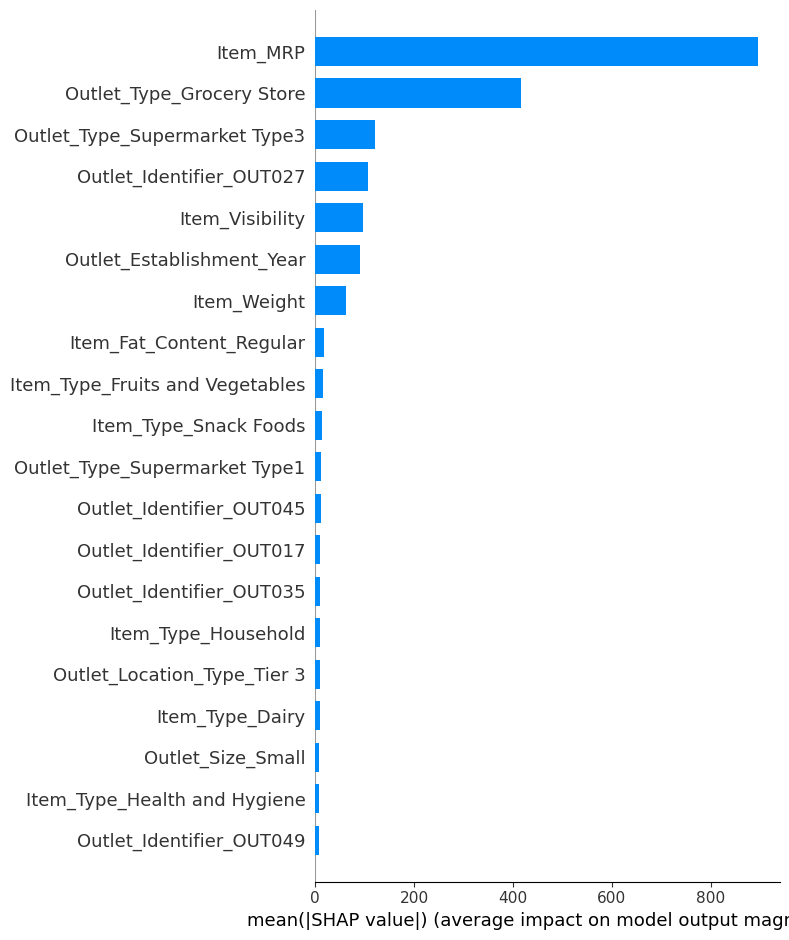

In [13]:
# Create shap bar plot
shap.summary_plot(shap_values, features=X_shap, plot_type='bar')


![](images/top_10_important_features.png)

The SHAP plot and feature importances are both very similar.
- In both plots, Item_MRP is the top feature used
- Outlet_Type_GroceryStore is 2nd for both

The differences begin with the third row.
- The SHAP plot shows Item_Visibility at 5th but in the feature importance, it is ranked 3rd.
- Item_Weight is outside of the top 5 in the SHAP but is ranked 4th in the important features.

Overall, the top 5 majority of features are the same.

![]()

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


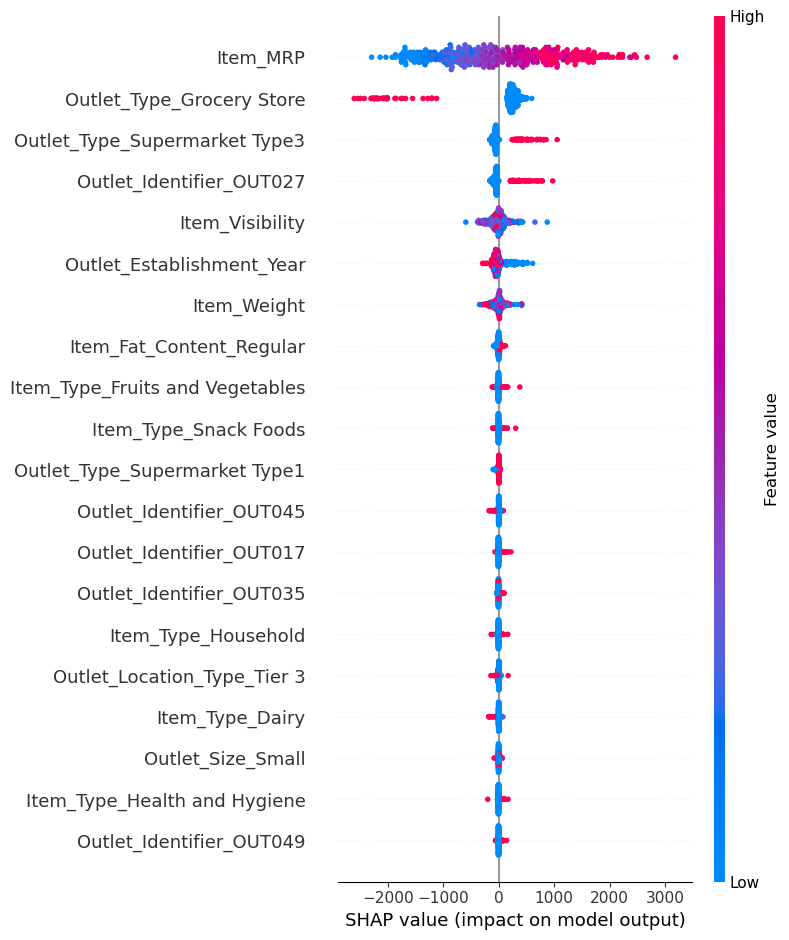

In [14]:
# Summary dot plot
shap.summary_plot(shap_values, features = X_shap)

- Top three features:
    - Item_MRP
      - The plot shows a larger amount of high values on the right side of the plot. This means that higher values in this feature will increase sales.
    - Outlet_Type_Grocery
      - The majority of high values for this feature are on the left-hand side of the plot. Items sold from outlets identified as grocery stores will sell for a lesser amount.
    - Outlet_Type_Supermarket 3
      - There is a high concentraion of high values on the right-hand side of the plot. Items sold from outlets identified as supermarket 3 will see more sales.

### Save SHAP Plots

In [15]:
# Ensure that the "images" exists.
os.makedirs("images/", exist_ok=True)

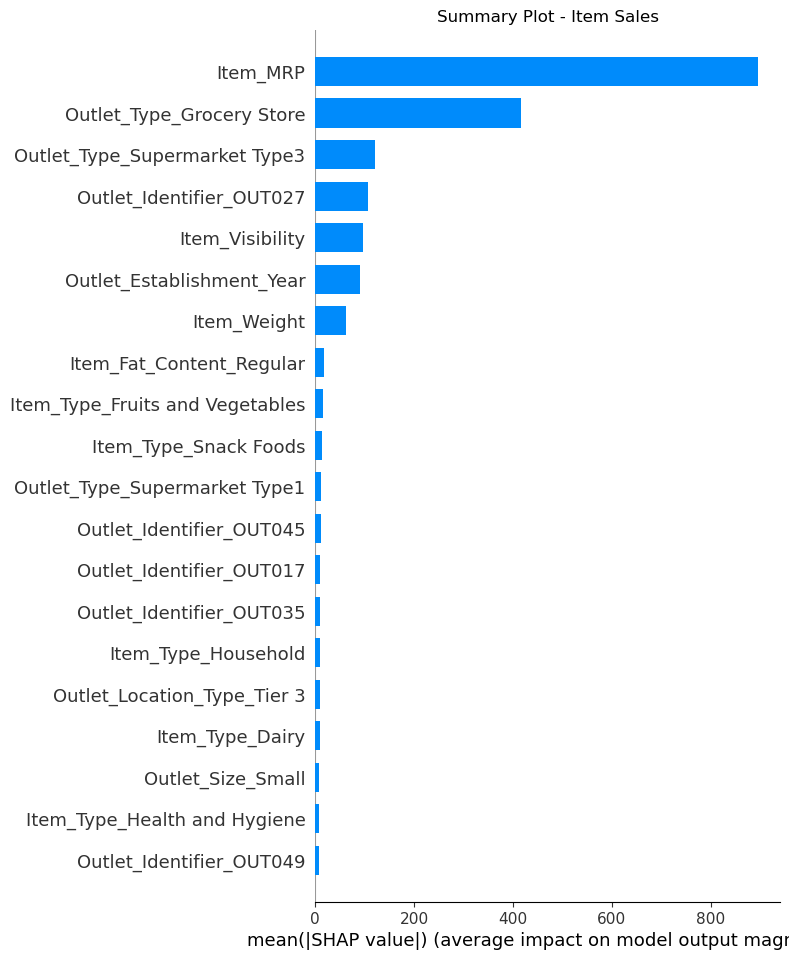

In [16]:
# Save bar plot
fig, ax = plt.subplots()
shap.summary_plot(shap_values, X_shap, plot_type = 'bar', show=False)
ax.set_title('Summary Plot - Item Sales');
fig.savefig('images/summary_plot_1.png')


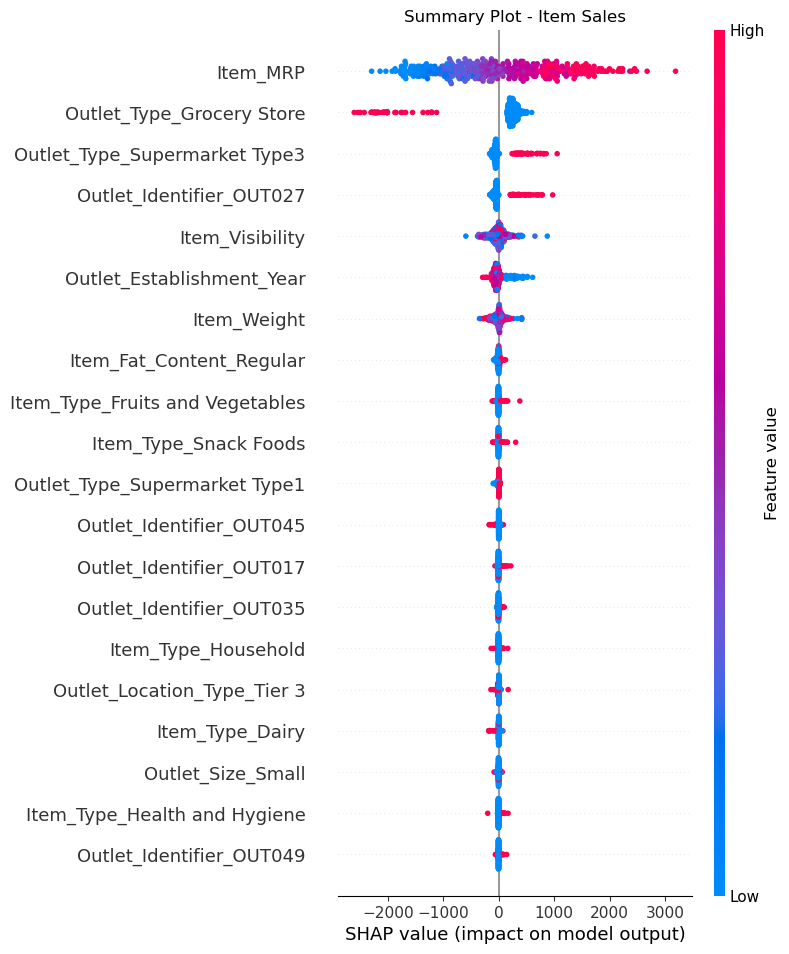

In [17]:
# Save dot plot
fig, ax = plt.subplots()
shap.summary_plot(shap_values, X_shap, show=False)
ax.set_title('Summary Plot - Item Sales');
fig.savefig('images/summary_plot_2.png')